In [1]:
#@title Run on TensorFlow 2.x
#%tensorflow_version 2.x
#from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [3]:
def create_model(learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.4))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

In [4]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
#plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

C:\Users\nm7uh\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 2s 31ms/step - loss: 1.0874 - accuracy: 0.6703 - val_loss: 0.3880 - val_accuracy: 0.8879
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.4337 - accuracy: 0.8695 - val_loss: 0.2852 - val_accuracy: 0.9196
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3203 - accuracy: 0.9062 - val_loss: 0.2380 - val_accuracy: 0.9329
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.2669 - accuracy: 0.9229 - val_loss: 0.2017 - val_accuracy: 0.9427
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 0.2302 - accuracy: 0.9328 - val_loss: 0.1791 - val_accuracy: 0.9488
Epoch 6/50
12/12 [==============================] - 0s 16ms/step - loss: 0.2038 - accuracy: 0.9420 - val_loss: 0.1631 - val_accuracy: 0.9535
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 0.1845 - accuracy: 0.9460 - val_loss: 0.1492 - val_accuracy: 0.9571
Epoch 8/50
12

[0.06797206401824951, 0.9796000123023987]

Prediction: 2, with the confidence of 99.99910593032837%


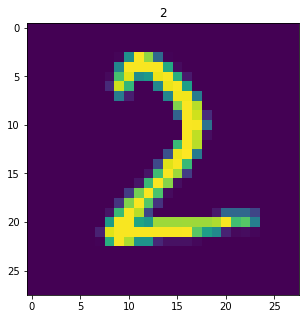

In [5]:
index = 512

plt.figure(figsize=(5,5))
plt.imshow(x_test_normalized[index])
plt.title(y_test[index])

output = my_model.predict(np.array([x_test_normalized[index]]))
prediction = np.argmax(output)
probability = output[0][prediction]


print(f"Prediction: {prediction}, with the confidence of {probability * 100}%")

In [6]:
predictions = my_model.predict(x_test_normalized)
for i in range(len(x_test_normalized)):
    if np.argmax(predictions[i]) != y_test[i]:
        print(f"Incorrect at index {i}") 

Incorrect at index 115
Incorrect at index 247
Incorrect at index 259
Incorrect at index 321
Incorrect at index 340
Incorrect at index 445
Incorrect at index 448
Incorrect at index 582
Incorrect at index 619
Incorrect at index 659
Incorrect at index 684
Incorrect at index 691
Incorrect at index 720
Incorrect at index 740
Incorrect at index 956
Incorrect at index 965
Incorrect at index 1003
Incorrect at index 1014
Incorrect at index 1039
Incorrect at index 1107
Incorrect at index 1112
Incorrect at index 1128
Incorrect at index 1178
Incorrect at index 1182
Incorrect at index 1226
Incorrect at index 1232
Incorrect at index 1242
Incorrect at index 1247
Incorrect at index 1319
Incorrect at index 1378
Incorrect at index 1393
Incorrect at index 1444
Incorrect at index 1500
Incorrect at index 1522
Incorrect at index 1530
Incorrect at index 1549
Incorrect at index 1553
Incorrect at index 1609
Incorrect at index 1621
Incorrect at index 1678
Incorrect at index 1681
Incorrect at index 1709
Incorrec

In [7]:
predictions

array([[3.0983873e-08, 2.5634981e-09, 1.0956786e-06, ..., 9.9948478e-01, 1.6271198e-07, 2.1385183e-06],
       [5.1790672e-10, 1.3950883e-04, 9.9986029e-01, ..., 6.3155678e-14, 3.6846486e-09, 2.0551755e-15],
       [1.6311424e-07, 9.9945337e-01, 5.6200108e-05, ..., 4.0978985e-04, 6.0010072e-05, 2.4575786e-07],
       ...,
       [4.9508054e-12, 2.9768316e-10, 4.9946266e-11, ..., 5.3813750e-07, 4.1265787e-07, 2.4981762e-06],
       [1.1314777e-09, 4.5201607e-09, 1.0157545e-12, ..., 1.1242662e-10, 1.1867797e-05, 6.4432583e-12],
       [1.8315756e-08, 8.2585105e-11, 1.0274272e-07, ..., 2.1637594e-14, 2.0218038e-09, 1.9474060e-11]], dtype=float32)